In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])


In [4]:
# ----- Evolution Strategy Parameters -----
np.random.seed(42)
dim = 2                         # Dimensionality
bounds = [-5.12, 5.12]          # Search space for Rastrigin
mu = 5                          # Number of parents
lmbda = 20                      # Number of offspring
sigma = 0.5                     # Initial mutation strength
generations = 200              # Number of generations

In [5]:
# ----- Initialize Population -----
population = np.random.uniform(bounds[0], bounds[1], (mu, dim))

In [12]:
# ----- Evolution Loop -----
best_fitness = []
best_solution = None

for gen in range(generations):
    # Generate offspring
    offspring = []
    for _ in range(lmbda):
        parents = population[np.random.choice(mu, mu, replace=False)]
        centroid = np.mean(parents, axis=0)
        mutation = np.random.randn(dim) * sigma
        child = centroid + mutation
        child = np.clip(child, bounds[0], bounds[1])
        offspring.append(child)

    # Evaluate offspring
    offspring = np.array(offspring)
    fitness = np.array([rastrigin(ind) for ind in offspring])

    # Select new parents
    idx = np.argsort(fitness)[:mu]
    population = offspring[idx]

    # Track best
    best_f = fitness[idx[0]]
    best_solution = offspring[idx[0]]
    best_fitness.append(best_f)

    if gen % 20 == 0 or gen == generations - 1:
        print(f"Generation {gen}: Best Fitness = {best_f:.4f}")



Generation 0: Best Fitness = 6.3766
Generation 20: Best Fitness = 3.2432
Generation 40: Best Fitness = 5.7217
Generation 60: Best Fitness = 0.2580
Generation 80: Best Fitness = 4.7182
Generation 100: Best Fitness = 1.5026
Generation 120: Best Fitness = 5.9543
Generation 140: Best Fitness = 5.1853
Generation 160: Best Fitness = 2.5254
Generation 180: Best Fitness = 2.3453
Generation 199: Best Fitness = 8.1854


In [13]:
# ----- Results -----
print("\nBest Solution Found:", best_solution)
print("Function Value at Best Solution:", rastrigin(best_solution))



Best Solution Found: [0.16924121 0.89186862]
Function Value at Best Solution: 8.185372653541283


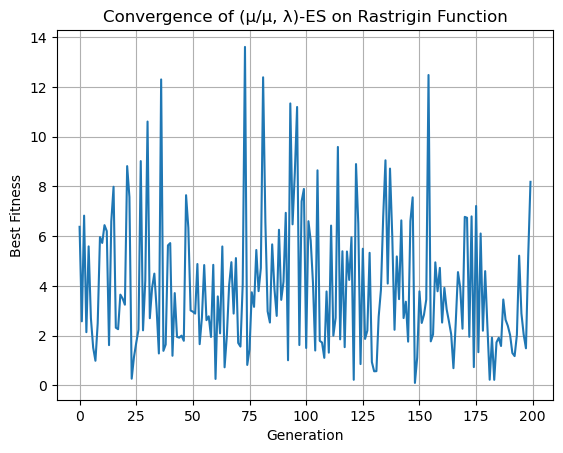

In [14]:
# ----- Plot Convergence -----
plt.plot(best_fitness)
plt.title("Convergence of (μ/μ, λ)-ES on Rastrigin Function")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid()
plt.show()
